<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/scikit_learn_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado Supervisionado:** Breast Câncer

Veja aqui um *resumo* do uso de classificadores e de regressão linear com o data-set `scikit-learn breast_cancer`.

<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ClassificationRegressionBreastCancer2.png" width=800, align="center">

# Exemplo: `breast_cancer`

In [19]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([X, y], axis=1)

display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Classificação `DecisionTreeClassifier`

<img src="https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/DecisionTree3.png?raw=true" width=800, align="right">

In [22]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.8811188811188811


# Métricas de Classificação

<img src="https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true" width=800, align="right">


# Classificação, outros estimadores

## Estimadores de Classificação do `scikit-learn`

In [ ]:
# Classificadores do scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Estimadores (sem parâmetros)
estimators = [
    LogisticRegression(max_iter=5000),
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=2000)
]

In [38]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Acurácia {clf}: {accuracy_score(y_test, y_pred):.3f}")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia LogisticRegression(max_iter=1000): 0.951
Acurácia KNeighborsClassifier(): 0.937
Acurácia SVC(): 0.937
Acurácia GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)): 0.951
Acurácia DecisionTreeClassifier(): 0.902
Acurácia RandomForestClassifier(): 0.972
Acurácia AdaBoostClassifier(): 0.944
Acurácia GaussianNB(): 0.937
Acurácia MLPClassifier(alpha=1, max_iter=1000): 0.923


# Correlação - Pearson

O coeficiente de correlação de Pearson é provavelmente a medida mais amplamente usada para relacionamentos lineares entre duas variáveis ​​distribuídas normalmente e, portanto, geralmente chamado apenas de "coeficiente de correlação".

$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$

<br>

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2  \sum_{i=1}^{n}(y_i - \overline{y})^2}}$$

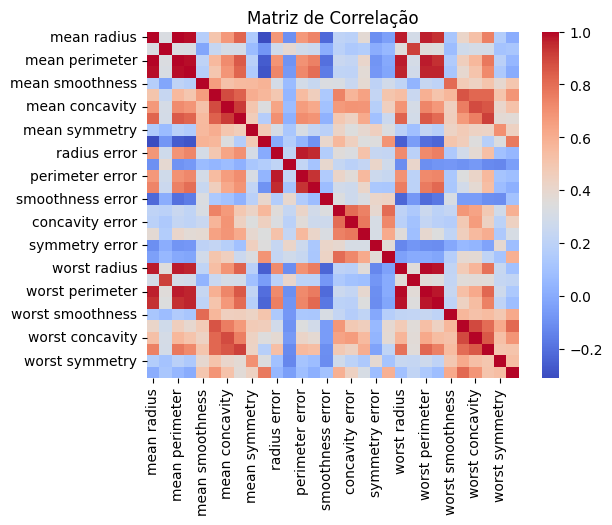

In [40]:
correlation_matrix = df.drop('target', axis=1).corr()

plt.figure(figsize=(6,4.5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


# Regressão Linear e Coeficiente de Determinação $R^2$

In [41]:
X = df.drop('mean area', axis=1)
y = df['mean area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Imprimindo os coeficientes do modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

from sklearn.metrics import r2_score

# Calcular o R2
r2 = r2_score(y_test, y_pred)

print(f'\nR2 Score: {r2}')

Mean Squared Error: 327.4536339850433
Coeficientes: [ 7.26614072e+01 -8.47381269e-01  6.96194539e+00 -5.19578732e+02
 -4.78003875e+02  3.69044957e+01  1.78034873e+02 -1.19411766e+02
  9.07682634e+02  5.31098587e+01 -7.55484563e+00  2.00126464e+01
 -6.26730158e-01  1.06763767e+03  4.42762382e+01  5.12834884e+02
 -3.69909510e+03 -6.98430034e+01 -1.69938862e+03 -5.70320796e+01
  9.15452700e-01 -2.69039301e+00  4.87813184e-01  3.50055311e+02
  3.43189523e+01 -7.46139348e+01  3.51648103e+02  7.98665871e+01
  1.97641683e+02 -1.25827052e+00]
Intercepto: -312.10121850080805

R2 Score: 0.9969149127862629


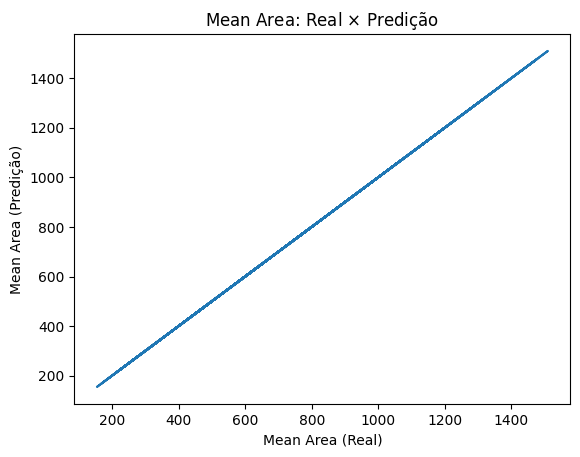

In [28]:
plt.plot( model.predict(X_test), y_pred)
plt.xlabel("Mean Area (Real)")
plt.ylabel("Mean Area (Predição)")
plt.title("Mean Area: Real $\\times$ Predição")
plt.show()
